In [ ]:
SMALL_SIZE, MEDIUM_SIZE = 9, 12
PROJECT_PATH = "/Users/donghur/Desktop/Research/Murthy/BM_GPU"
PROJECT_PATH_BMGPU = "/Users/donghur/Desktop/Research/Murthy/BM_GPU"

In [ ]:
import sys
import numpy as np
from glob import glob
import random, matplotlib
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

sys.path.append(PROJECT_PATH)
from utils.data import Dataset


In [ ]:
import utils.figure as ufigure
%load_ext autoreload
%autoreload 1
%aimport utils.data
%aimport utils.figure

In [ ]:
config_path = f"{PROJECT_PATH_BMGPU}/config_ant.yaml"
Data = Dataset(PROJECT_PATH, config_path)
Data.load_data()

In [ ]:
# configuration
INFO = Data.info
INFO_values = Data.info_values
config = Data.config
skeleton = config['skeleton']
skeleton_color= config['skeleton_color']

# features
bp = Data.data_obj['bodypoints']
rot_bp = Data.data_obj['rotated_bodypoints']
angles = Data.data_obj['angles']
limbs = Data.data_obj['limbs']
angle_power = Data.data_obj['angle_power']
limb_power = Data.data_obj['limb_power']

# embeddings
all_embed = Data.data_obj['all_embeddings']
all_postural_embed = Data.data_obj['all_postural_embeddings']
all_kinematic_embed = Data.data_obj['all_kinematic_embeddings']

# Overview

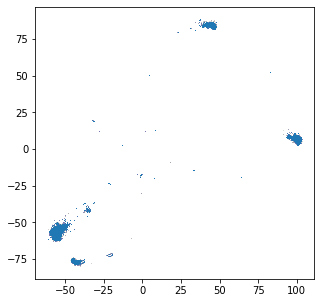

In [9]:
fig_all_embed, ax_all_embed = plt.subplots(1,1,figsize=(5,5))
ax_all_embed.scatter(all_embed[:,0], all_embed[:,1], s=1, alpha=0.005)
plt.show()

In [10]:
# Global parameter for the rest of the embeddings
ax_x_length = np.diff(ax_all_embed.get_xlim())[0]
ax_y_length = np.diff(ax_all_embed.get_ylim())[0]

def fix_aspect_ratio(xlim, ylim):
    d = np.diff(xlim)[0]*ax_y_length/ax_x_length - np.diff(ylim)[0]
    return xlim, (ylim[0]-d/2, ylim[1]+d/2)

def plot_embedding(embed, xlim, ylim, frac_pts=1/3, scatter_s=1, scatter_alpha=0.04, kde_gridsize=200):
    num_fr = len(embed)
    idx = random.choices(np.arange(num_fr), k=int(num_fr*frac_pts))
    
    # Scatter Plot
    fig, ax = plt.subplots(1,2,figsize=(20,10))
    ax[0].scatter(embed[idx,0], embed[idx,1], s=scatter_s, alpha=scatter_alpha)
    ax[0].set(xlabel='UMAP C1', ylabel='UMAP C2', title="All Postural Features Embedding", xlim=xlim,ylim=ylim)

    # Density Plot
    sns.kdeplot(x=embed[idx,0], y=embed[idx,1], 
                shade=True, thresh=0, gridsize=kde_gridsize, bw_adjust=0.3,
                levels=100, cmap='viridis',
                cbar=False, ax=ax[1])
    ax[1].set(xlabel='UMAP C1', ylabel='UMAP C2', title="All Postural Features Embedding", facecolor='#440054', 
                        xlim=xlim ,ylim=ylim)
    plt.show()

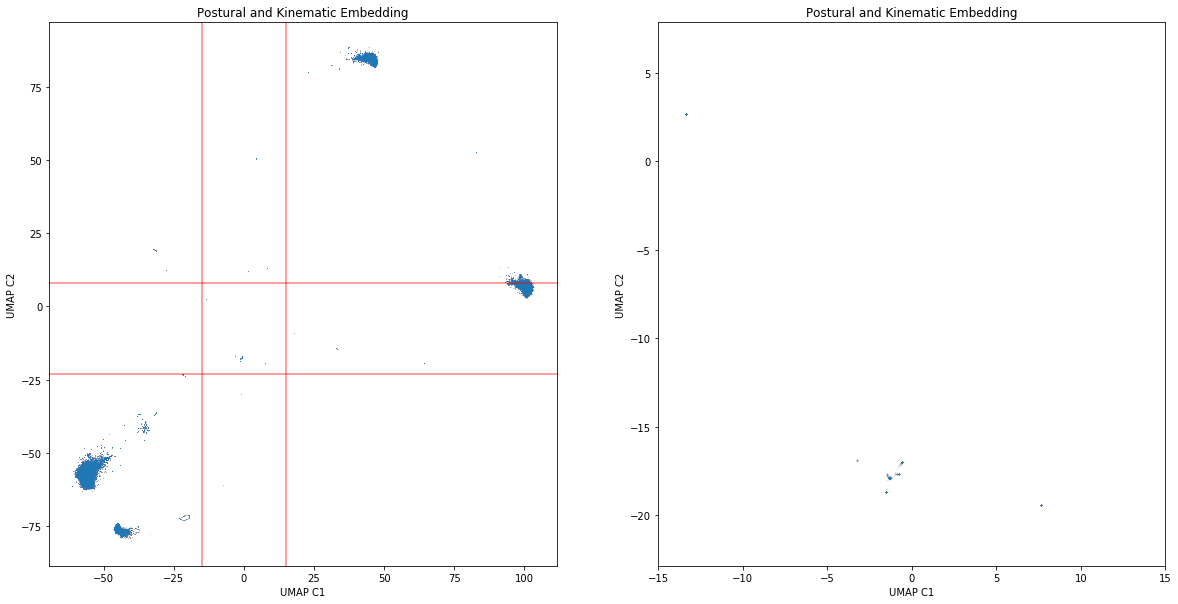

In [10]:
region_x_lim, region_y_lim = (-15,15), (-20,5)
region_x_lim, region_y_lim = fix_aspect_ratio(region_x_lim, region_y_lim)

fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].scatter(all_embed[:,0], all_embed[:,1], s=1, alpha=0.005)
ax[0].set(xlabel="UMAP C1", ylabel="UMAP C2", title="Postural and Kinematic Embedding")
for x,y in zip(region_x_lim, region_y_lim):
    ax[0].axhline(y=y, color='r', alpha=0.5)
    ax[0].axvline(x=x, color='r', alpha=0.5)
ax[1].scatter(all_embed[:,0], all_embed[:,1], s=1.5, alpha=0.002)
ax[1].set(xlabel="UMAP C1", ylabel="UMAP C2", title="Postural and Kinematic Embedding",xlim=region_x_lim, ylim=region_y_lim)
plt.show()

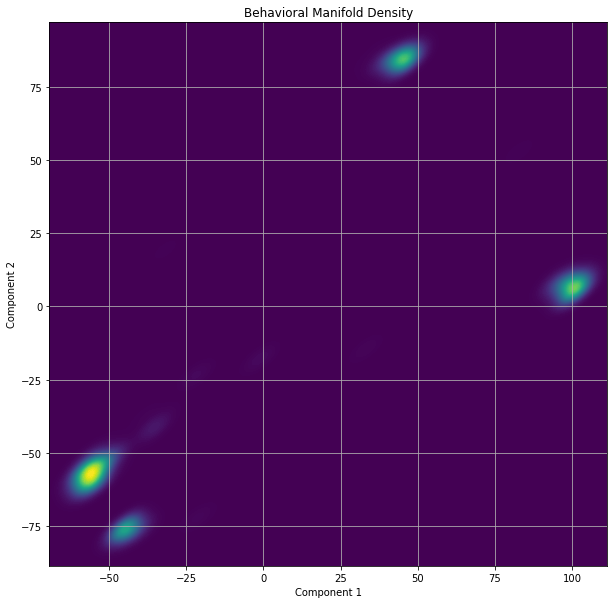

In [12]:
import seaborn as sns

good_fr, _ = np.where(~np.isnan(all_embed))

fig_dense, ax_density = plt.subplots(figsize=(10, 10))
sns.kdeplot(x=all_embed[good_fr,0], y=all_embed[good_fr,1], 
            shade=True, thresh=0, gridsize=300, bw_adjust=0.5,
            levels=100, cmap='viridis',
            cbar=False, ax=ax_density)
ax_density.set(xlabel='Component 1', ylabel='Component 2', title="Behavioral Manifold Density", facecolor='#440054', xlim=ax_all_embed.get_xlim(), ylim=ax_all_embed.get_ylim())
ax_density.grid(which="major")
plt.show()

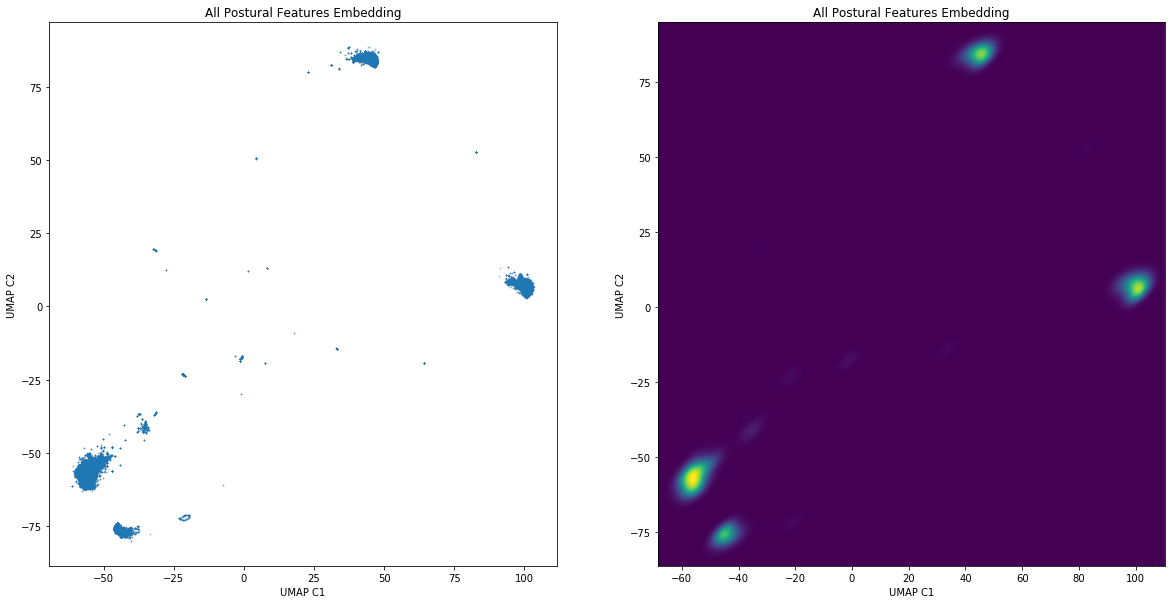

In [13]:
### Region 1
# find figure bounds
region_x_lim, region_y_lim = None, None #(-4,8.5), (-6.5,3)
# region_x_lim, region_y_lim = fix_aspect_ratio(region_x_lim, region_y_lim)

# plot region 1
plot_embedding(all_embed, region_x_lim, region_y_lim, frac_pts=1/2, 
               scatter_s=1, scatter_alpha=0.025, 
               kde_gridsize=300)

# HDBSCAN

In [21]:
# %matplotlib qt
%matplotlib inline


In [18]:
import seaborn as sns
from sklearn.utils import shuffle

from utils.figure import plot_HDBSCAN
from cluster import HDBSCAN
%aimport cluster

In [38]:
# hdbscan
labels, num_clusters, clusterer = HDBSCAN(all_embed, min_cluster_size=3000, min_samples=20, 
                               cluster_selection_epsilon=0, cluster_selection_method="leaf", 
                               memory="memory")
color_palette = sns.color_palette('rainbow', int(num_clusters))
color_palette = shuffle(color_palette, random_state=1)

Frac Outlier: 0.18805184233213576
# Clusters: 22


100%|██████████| 22/22 [00:00<00:00, 14426.94it/s]


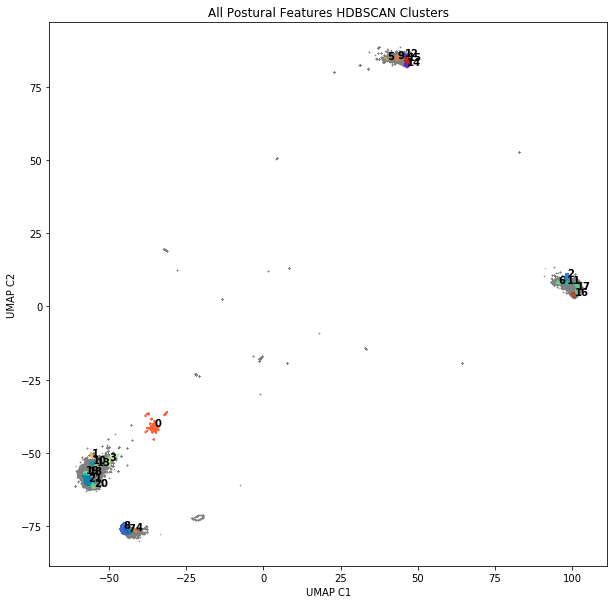

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
plot_HDBSCAN(ax, all_embed, labels, color_palette, alpha=0.02, toggle_numbering=True)
plt.show()




100%|██████████| 5/5 [00:00<00:00, 7053.99it/s]


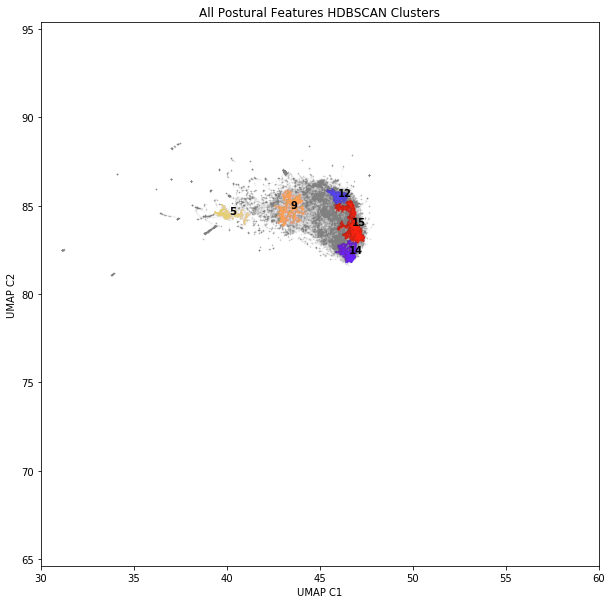

In [42]:
region_x_lim, region_y_lim = (30,60), (60,100)
region_x_lim, region_y_lim = fix_aspect_ratio(region_x_lim, region_y_lim)

fig, ax = plt.subplots(figsize=(10,10))
plot_HDBSCAN(ax, all_embed, labels, color_palette, alpha=0.02, xlim=region_x_lim, ylim=region_y_lim, toggle_numbering=True)
plt.show()

100%|██████████| 12/12 [00:00<00:00, 10170.06it/s]


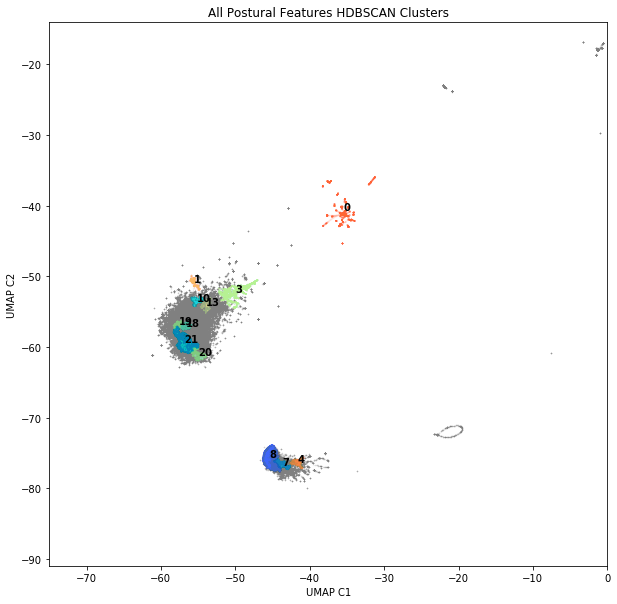

In [43]:
region_x_lim, region_y_lim = (-75,0), (-80,-25)
region_x_lim, region_y_lim = fix_aspect_ratio(region_x_lim, region_y_lim)

fig, ax = plt.subplots(figsize=(10,10))
plot_HDBSCAN(ax, all_embed, labels, color_palette, alpha=0.02, xlim=region_x_lim, ylim=region_y_lim, toggle_numbering=True)
plt.show()

100%|██████████| 5/5 [00:00<00:00, 7481.81it/s]


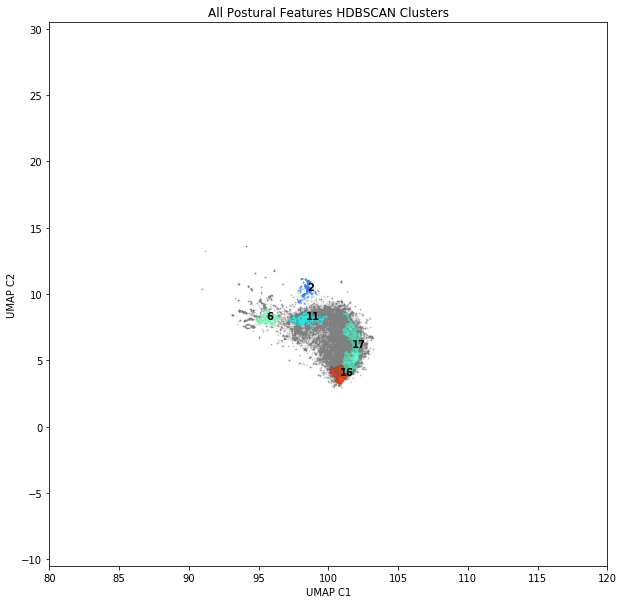

In [44]:
region_x_lim, region_y_lim = (80,120), (-5,25)
region_x_lim, region_y_lim = fix_aspect_ratio(region_x_lim, region_y_lim)

fig, ax = plt.subplots(figsize=(10,10))
plot_HDBSCAN(ax, all_embed, labels, color_palette, alpha=0.02, xlim=region_x_lim, ylim=region_y_lim, toggle_numbering=True)
plt.show()

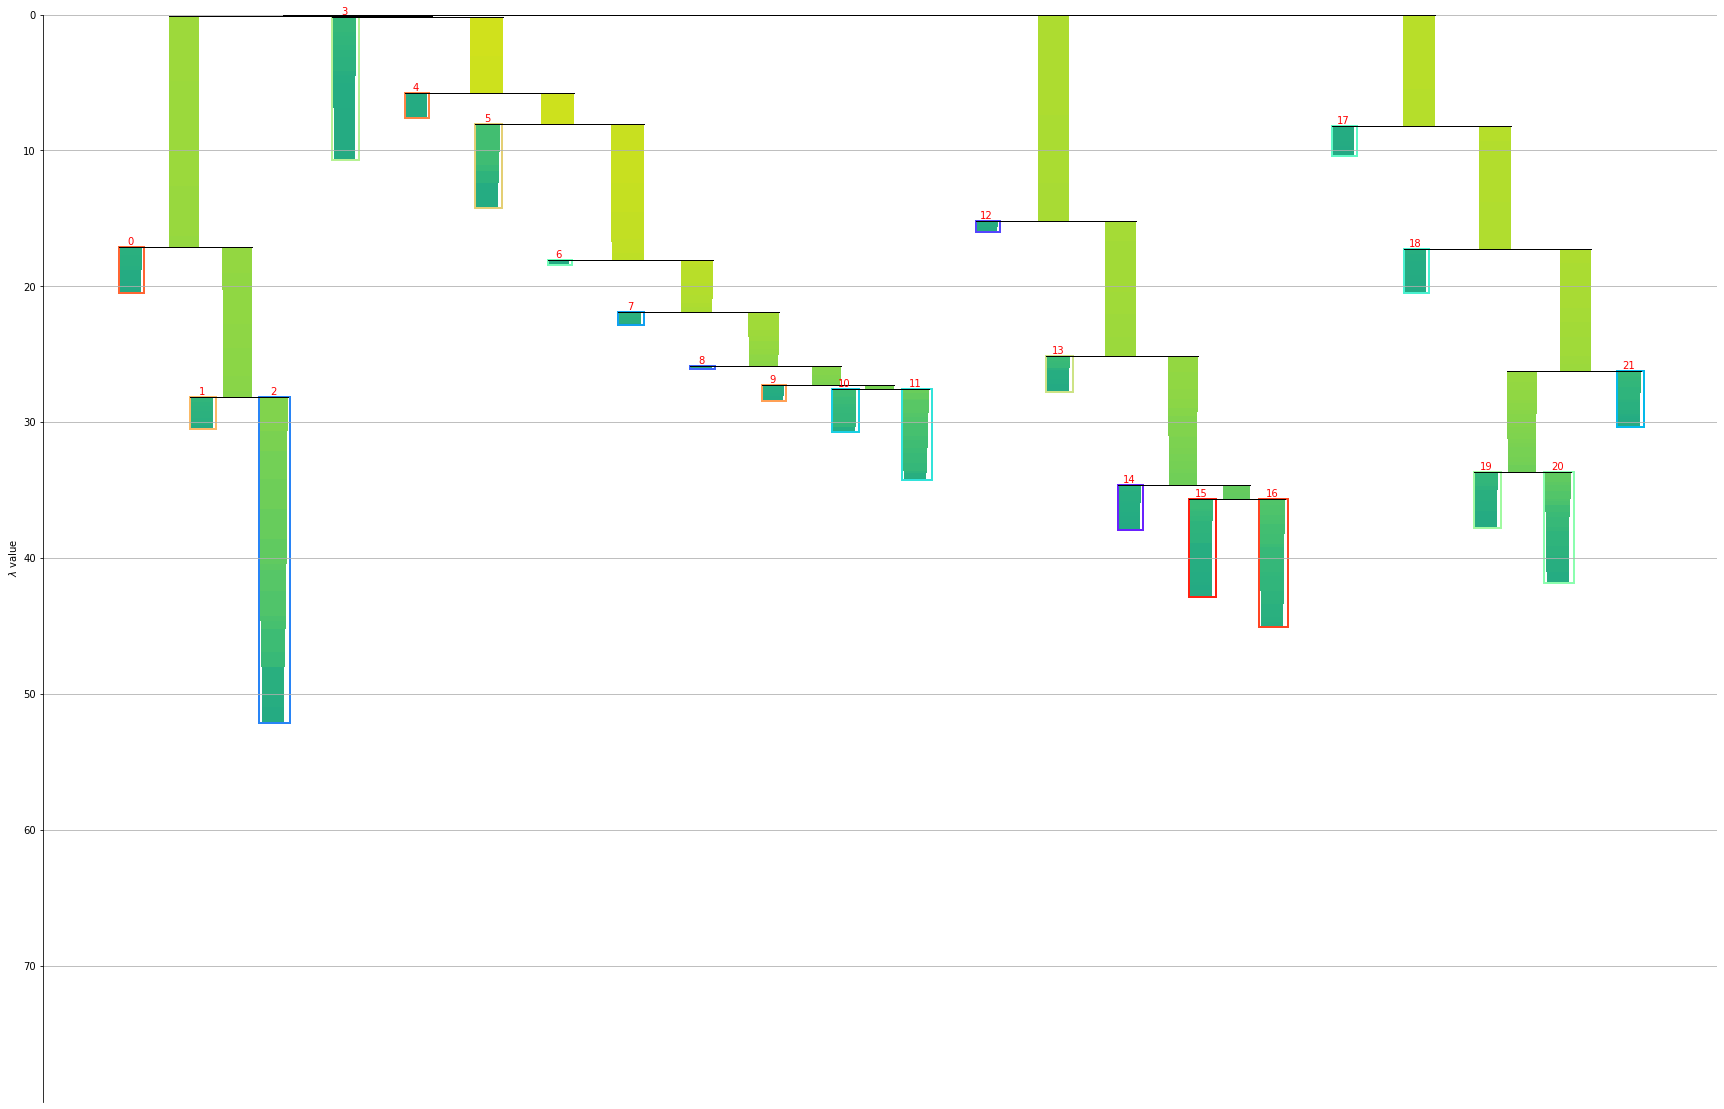

In [45]:
fig, ax = plt.subplots(figsize=(30,20))
ax.set(ylim=(0,80), yticks=np.arange(0,80,10))
clusterer.condensed_tree_.plot(leaf_separation=2,
                               label_clusters=True,
                               log_size=True,
                               colorbar=False,
                               select_clusters=True,
                               selection_palette=color_palette,
                               axis=ax)
ax.grid(axis='y')

# Save HDBSCAN Cluster

In [50]:
import os
for val in INFO_values:
    start_fr, stop_fr = val['global_start_fr'], val['global_stop_fr']
    save_path = f"/Users/donghur/Desktop/Research/Murthy/BM_GPU_cluster/{val['directory']}"
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    np.save(f"{save_path}/cluster.npy", labels[start_fr:stop_fr])

# Region 1: Deeper Analysis

In [31]:
import seaborn as sns
from sklearn.utils import shuffle
from utils.figure import plot_HDBSCAN

labels = Data.data_obj['cluster']
num_clusters = int(np.max(labels)+1)
color_palette = sns.color_palette('rainbow', int(num_clusters))
color_palette = shuffle(color_palette, random_state=1)

region_x_lim, region_y_lim = (35,50), (75,95)
region_x_lim, region_y_lim = fix_aspect_ratio(region_x_lim, region_y_lim)

100%|██████████| 5/5 [00:00<00:00, 2842.44it/s]


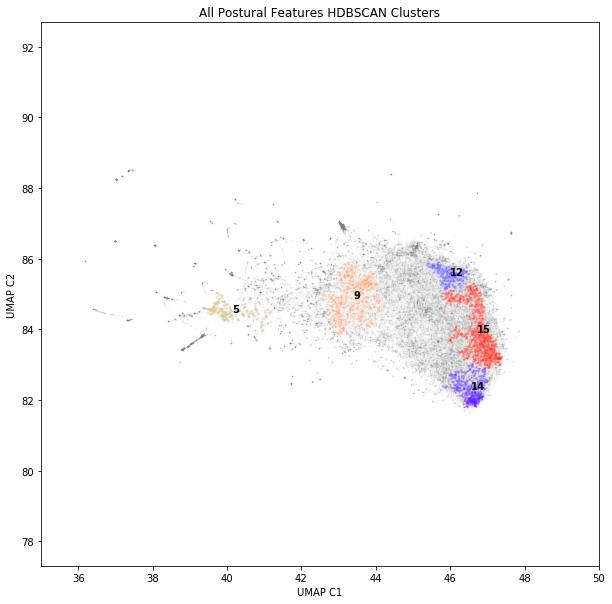

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
plot_HDBSCAN(ax, all_embed, labels, color_palette, alpha=0.02, xlim=region_x_lim, ylim=region_y_lim, toggle_numbering=True)
plt.show()

In [33]:
x_bound_cond = (all_embed[:,0]>region_x_lim[0]) & (all_embed[:,0]<region_x_lim[1])
y_bound_cond = (all_embed[:,1]>region_y_lim[0]) & (all_embed[:,1]<region_y_lim[1])

region_fr_idx, = np.where(x_bound_cond & y_bound_cond)

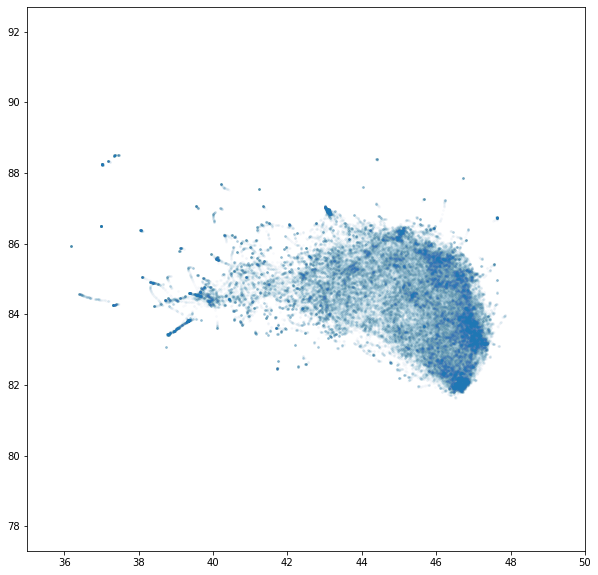

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(all_embed[region_fr_idx,0], all_embed[region_fr_idx,1], alpha=0.02, s=3)
ax.set(xlim=region_x_lim, ylim=region_y_lim)
plt.show()

## Postural

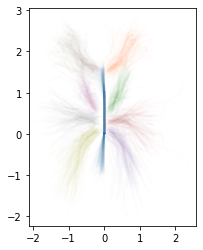

In [58]:
fig, ax = plt.subplots(figsize=(3,4))

rand_idx = shuffle(region_fr_idx)[:100]
# plot bodypoints
# ax.scatter(rot_bp[rand_idx,:,0], rot_bp[rand_idx,:,1], alpha=0.1, s=7, c='k')
# ax.set(title=f"Ant Model Bodypoints", xlabel="scaled x coord", ylabel="scaled y coord")

# plot skeleton
if (skeleton is not None) and (skeleton_color is not None):
    for skeleton_i, color_i in zip(skeleton, skeleton_color):
        for fr in rand_idx:
            ax.plot(rot_bp[fr,skeleton_i,0], rot_bp[fr,skeleton_i,1], alpha=0.01, c=color_i, linewidth=2)
plt.show()

## Kinematic

In [61]:
max_freq, min_freq = 1/config['period_min'], 1/config['period_max'] # Nyquist Frequency
freq = max_freq*2**(-1*np.log2(max_freq/min_freq)*
    (np.arange(config['f_bin'],0,-1)-1)/(config['f_bin']-1)) # dyadic frequency bins

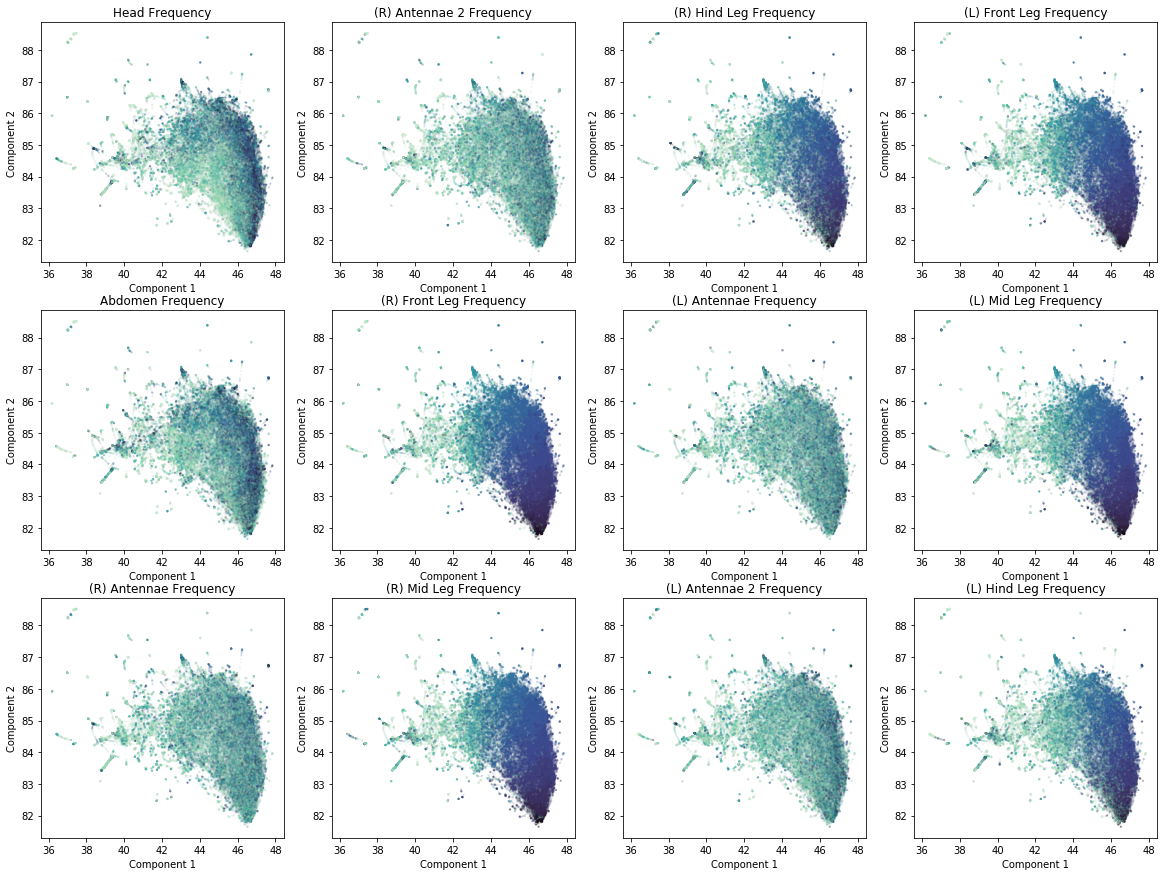

In [64]:
# Figure Information
max_freq_idx = np.argmax(angle_power[:,:,:], axis=1)
max_freq = freq[max_freq_idx]
num_freq = len(freq)

# Freq Color Scheme
freq_color_palette = sns.color_palette('mako_r', num_freq)
cmap1, norm1 = matplotlib.colors.from_levels_and_colors(freq, freq_color_palette, extend="max")

# Figures
fig, ax = plt.subplots(3,4, figsize=(20,15))
for angle_idx in tqdm(range(12)):
    fig_title = f"{config['angle_labels'][angle_idx]} Frequency"
    freq_cluster_colors = np.array([freq_color_palette[f] for f in max_freq_idx[region_fr_idx,angle_idx]])

    ax[angle_idx%3, angle_idx//3].scatter(all_embed[region_fr_idx,0], all_embed[region_fr_idx,1], color=freq_cluster_colors, alpha=0.05, s=1.5)  
    ax[angle_idx%3, angle_idx//3].set(xlabel='Component 1', ylabel='Component 2', title=fig_title) # xlim=region_x_lim, ylim=region_y_lim

plt.show()

# Regional HDBSCAN

In [8]:
import seaborn as sns
from sklearn.utils import shuffle
from utils.figure import plot_HDBSCAN
from cluster import HDBSCAN

In [9]:
region_x_lim, region_y_lim = (35,50), (75,95)
region_x_lim, region_y_lim = fix_aspect_ratio(region_x_lim, region_y_lim)

x_bound_cond = (all_embed[:,0]>region_x_lim[0]) & (all_embed[:,0]<region_x_lim[1])
y_bound_cond = (all_embed[:,1]>region_y_lim[0]) & (all_embed[:,1]<region_y_lim[1])

region_fr_idx, = np.where(x_bound_cond & y_bound_cond)
region_embed = all_embed[region_fr_idx,:]

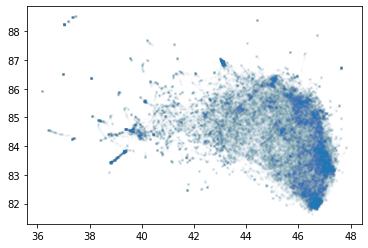

In [10]:
plt.scatter(region_embed[:,0], region_embed[:,1], alpha=0.01,s=2)
plt.show()

In [23]:
# hdbscan
region_labels, region_num_clusters, region_clusterer = HDBSCAN(region_embed, min_cluster_size=650, min_samples=3, 
                               cluster_selection_epsilon=0, cluster_selection_method="leaf", 
                               memory="memory")
color_palette = sns.color_palette('rainbow', int(region_num_clusters))
color_palette = shuffle(color_palette, random_state=1)

Frac Outlier: 0.5391526798527485
# Clusters: 30


100%|██████████| 30/30 [00:00<00:00, 10974.11it/s]


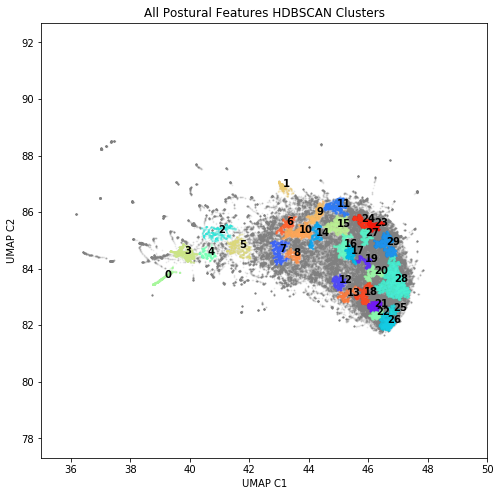

In [24]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

center_pts = plot_HDBSCAN(ax, region_embed, region_labels, color_palette, marker_size=1, alpha=0.1, 
             xlim=region_x_lim, ylim=region_y_lim, toggle_numbering=True)

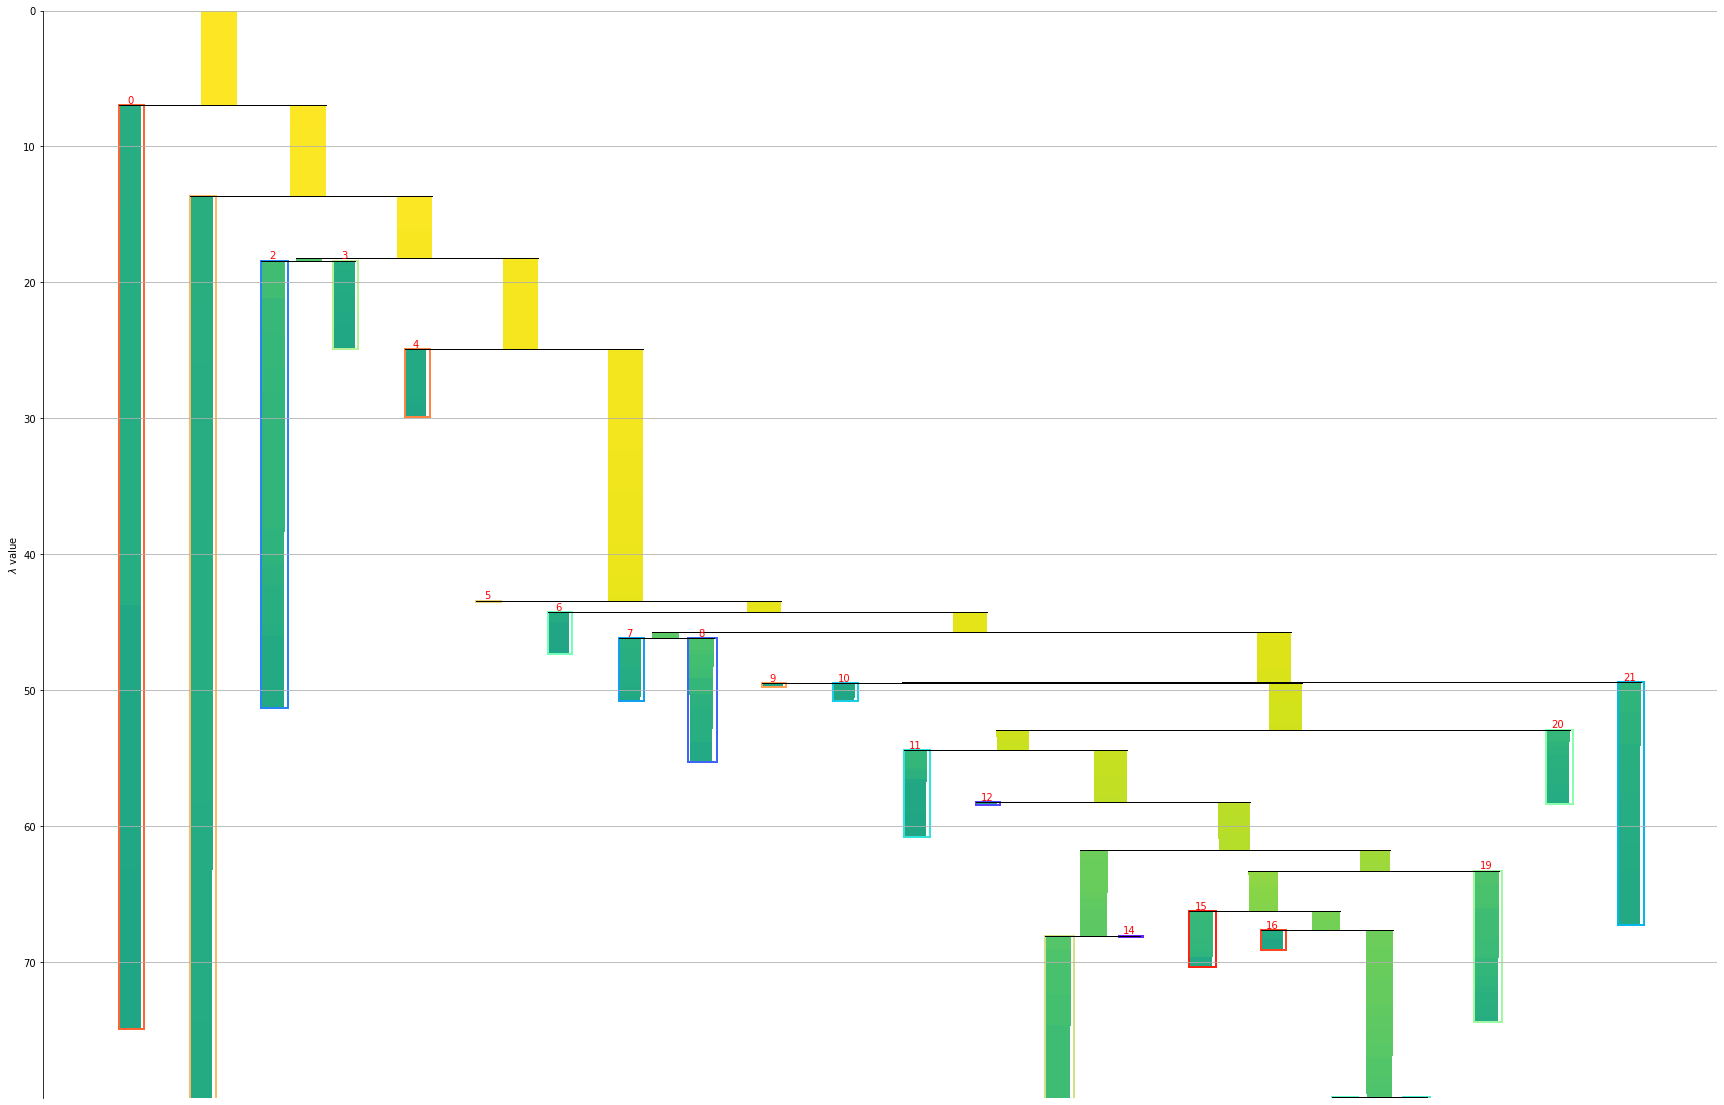

In [70]:
fig, ax = plt.subplots(figsize=(30,20))
ax.set(ylim=(0,80), yticks=np.arange(0,80,10))
region_clusterer.condensed_tree_.plot(leaf_separation=2,
                               label_clusters=True,
                               log_size=True,
                               colorbar=False,
                               select_clusters=True,
                               selection_palette=color_palette,
                               axis=ax)
ax.grid(axis='y')

# Plot GMM

In [84]:
import seaborn as sns
from sklearn.utils import shuffle
from utils.figure import plot_HDBSCAN
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

In [26]:
region_x_lim, region_y_lim = (35,50), (75,95)
region_x_lim, region_y_lim = fix_aspect_ratio(region_x_lim, region_y_lim)

x_bound_cond = (all_embed[:,0]>region_x_lim[0]) & (all_embed[:,0]<region_x_lim[1])
y_bound_cond = (all_embed[:,1]>region_y_lim[0]) & (all_embed[:,1]<region_y_lim[1])

region_fr_idx, = np.where(x_bound_cond & y_bound_cond)
region_embed = all_embed[region_fr_idx,:]

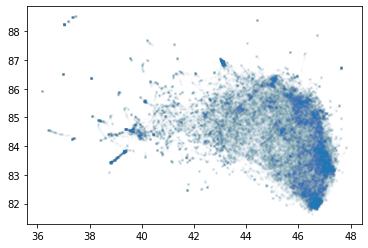

In [27]:
plt.scatter(region_embed[:,0], region_embed[:,1], alpha=0.01,s=2)
plt.show()

In [89]:
gmm = BayesianGaussianMixture(n_components=100, random_state=0, weight_concentration_prior=0.001).fit(region_embed)
labels = gmm.predict(region_embed)

/Users/donghur/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [90]:
np.max(labels)+1

100

In [34]:
gmm_prob = gmm.predict_proba(region_embed)

In [82]:
thresh = 0.6

num_fr = len(gmm_prob)
prob_labels = np.zeros(num_fr)
for i_fr in range(num_fr):
    if any(gmm_prob[i_fr]>thresh):
        prob_labels[i_fr] = np.argmax(gmm_prob[i_fr])
    else:
        prob_labels[i_fr] = -1

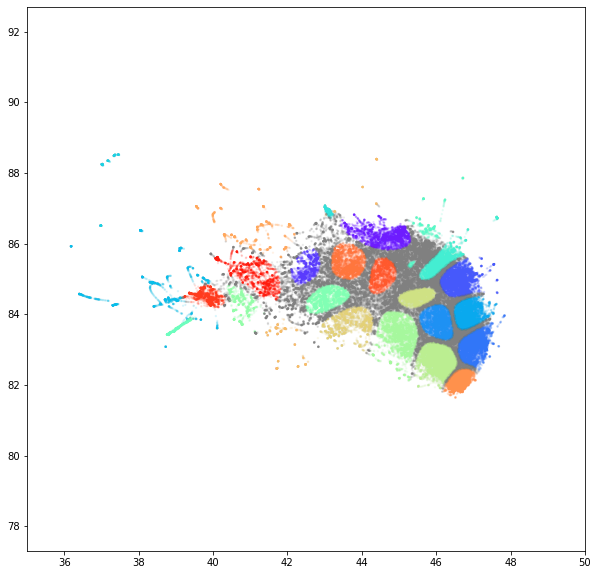

In [83]:
cluster = prob_labels

# define coloring
region_num_clusters = np.max(cluster)+1
color_palette = sns.color_palette('rainbow', int(region_num_clusters))
color_palette = shuffle(color_palette, random_state=1)
cluster_colors = np.array([color_palette[int(x)] if int(x) >= 0
                      else (0.5, 0.5, 0.5)
                      for x in cluster])
# create figure
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(region_embed[:,0], region_embed[:,1], alpha=0.1, s=2, c=cluster_colors)
ax.set(xlim=region_x_lim, ylim=region_y_lim)
plt.show()

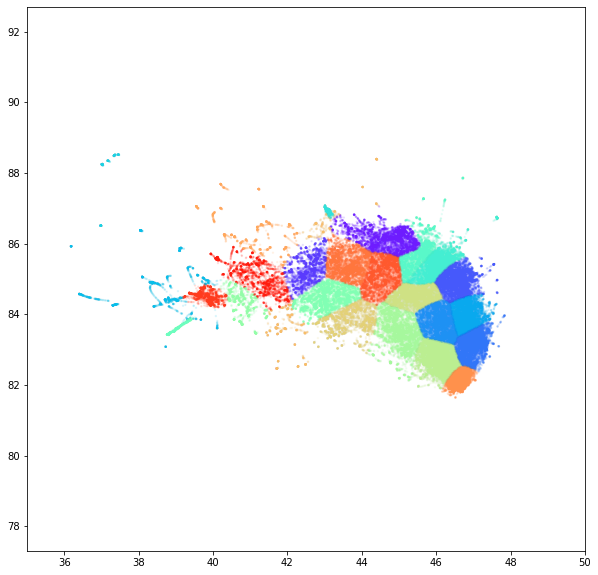

In [81]:
cluster = labels

# define coloring
region_num_clusters = np.max(cluster)+1
color_palette = sns.color_palette('rainbow', int(region_num_clusters))
color_palette = shuffle(color_palette, random_state=1)
cluster_colors = np.array([color_palette[int(x)] if int(x) >= 0
                      else (0.5, 0.5, 0.5)
                      for x in cluster])
# create figure
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(region_embed[:,0], region_embed[:,1], alpha=0.1, s=2, c=cluster_colors)
ax.set(xlim=region_x_lim, ylim=region_y_lim)
plt.show()

In [85]:
aic_list = []
bic_list = []
for i_cluster in tqdm(np.arange(1,50)):
    gmm = GaussianMixture(n_components=i_cluster, random_state=0).fit(region_embed)
    aic_list.append( gmm.aic(region_embed) )
    bic_list.append( gmm.bic(region_embed) )


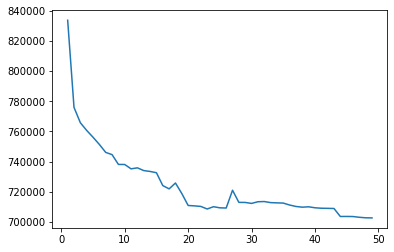

In [87]:
plt.plot(np.arange(1,50), aic_list)
plt.show()

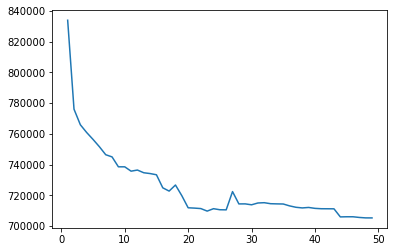

In [88]:
plt.plot(np.arange(1,50), bic_list)
plt.show()

In [89]:
bic_list[25:35]

[710596.4933531922,
 722466.3426749832,
 714456.7391446511,
 714477.8784772241,
 713887.8229569776,
 715058.8648269209,
 715249.2827422051,
 714597.4905647207,
 714480.8069040041,
 714402.1022788065]

# Watershed Clustering

In [44]:
import seaborn as sns
from sklearn.utils import shuffle

from utils.figure import plot_HDBSCAN
from cluster import Watershed
%load_ext autoreload
%autoreload 1
%aimport cluster

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


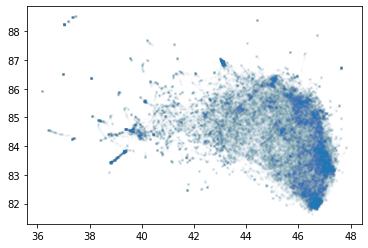

In [11]:
region_x_lim, region_y_lim = (35,50), (75,95)
region_x_lim, region_y_lim = fix_aspect_ratio(region_x_lim, region_y_lim)

x_bound_cond = (all_embed[:,0]>region_x_lim[0]) & (all_embed[:,0]<region_x_lim[1])
y_bound_cond = (all_embed[:,1]>region_y_lim[0]) & (all_embed[:,1]<region_y_lim[1])

region_fr_idx, = np.where(x_bound_cond & y_bound_cond)
region_embed = all_embed[region_fr_idx,:]

plt.scatter(region_embed[:,0], region_embed[:,1], alpha=0.01,s=2)
plt.show()

In [ ]:
watershed_labels = Watershed(data=region_embed, grid_dim=250, grid_padding=2, verbose=True, fig_alpha=0.02, fig_s=2, watershed_line=True)

100%|██████████| 34/34 [00:00<00:00, 8009.34it/s]


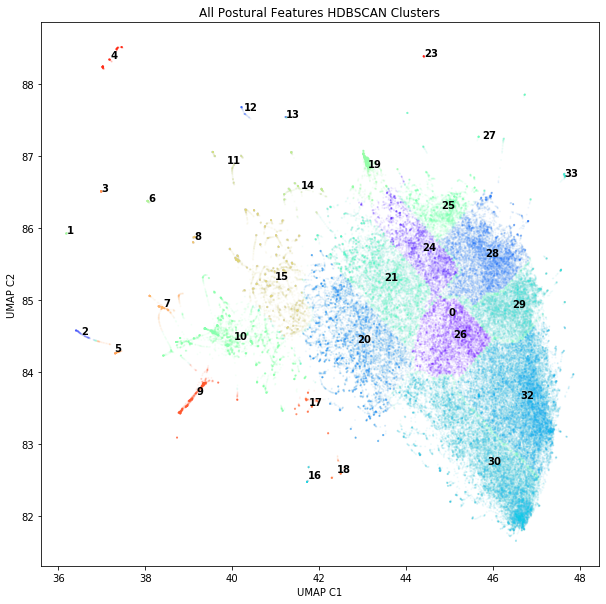

In [39]:
num_clusters = np.max(watershed_labels)+1

color_palette = sns.color_palette('rainbow', int(num_clusters))
color_palette = shuffle(color_palette, random_state=1)

fig, ax = plt.subplots(figsize=(10,10))
plot_HDBSCAN(ax, region_embed, watershed_labels, color_palette, alpha=0.05, toggle_numbering=True)
plt.show()

